# Lab02

# Matplotlib
Pandas documentation: http://matplotlib.org/contents.html

매트플롯립(Matplotlib)은 도표나 그래프를 만들기 위해 사용합니다.

### Caution
Matplotlib의 sub-module인 pyplot을 **Windows**환경에서 구성하는 데에 문제가 있습니다. (이외에 Linux(especially Ubuntu)와 OS X에서는 문제가 없음을 확인하였습니다.)

이를 해결하기 위해서는 {your anaconda directory}\Lib\site-packages\matplotlib\font_manager.py를 수정해야 합니다. fond_manager.py 내에 `win32InstalledFonts()` 함수 안의 내용 중에 일부를 다음과 같이 바꾸어야 합니다.


```{.python}
key, direc, any = winreg.EnumValue( local, j)
if not is_string_like(direc):
    continue
if not os.path.dirname(direc):
    direc = os.path.join(directory, direc)
direc = direc.split('\0', 1)[0]
```


저의 경우에는 `direc = os.path.abspath(direc).lower()`를 `direc = direc.split('\0', 1)[0]`로 변경하여 문제를 해결하였습니다.

참고한 글은 http://stackoverflow.com/a/34007642 입니다.

## 0. Basic

이 라이브러리는 보통 다음과 같이 사용됩니다:

- 데이터와 함께 plotting 함수를 호출합니다.
- plot의 property들을 설정하기 위해 다양한 함수를 부릅니다.
- plot이 보이도록(출력되도록) 합니다.

In [1]:
# matplotlib의 결과물을 notebook에 바로 띄우기 위한 문구
%matplotlib inline

# import packages
# 여기에서는 matplotlib의 submodule인 pyplot을 주로 활용
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['font.size'] = 10

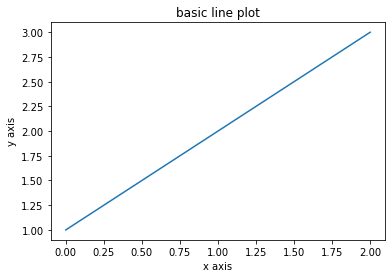

In [2]:
# basic line plot
myarray = np.array([1,2,3])
plt.plot(myarray)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('basic line plot')
plt.show()

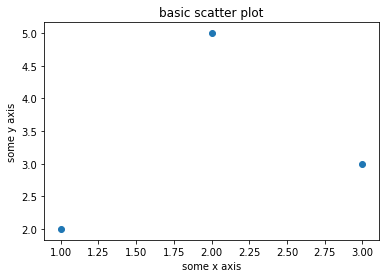

In [3]:
# basic scatter plot
x = np.array([1, 2, 3])
y = np.array([2, 5, 3])
plt.scatter(x,y)
plt.xlabel('some x axis')
plt.ylabel('some y axis')
plt.title('basic scatter plot')
plt.show()

In [4]:
import os
from os.path import join

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

datapath = join('data','wine.txt')
labelpath = join('data','wine_attributes.txt')

columns = list()
with open(labelpath, 'r') as f:
    columns = f.read().split('\n')

## 1. 데이터 살펴보기
이번 장에서 우리가 사용할 데이터는 178개의 행과 14개의 열로 이루어진 와인 데이터 입니다. <br>
와인 데이터가 가진 컬럼에 대해 간단히 살펴 보겠습니다.<br>
와인 데이터는 13개의 컬럼을 가지고 있으며, 3개의 등급으로 나누어진 데이터셋 입니다.<br>
해당 데이터셋은 등급 컬럼을 이용해 분류에 사용할 수도 있고, 클러스터링, 회귀, 차원축소 등 여러가지 머신러닝 기법에 사용될 수 있습니다.<br><br>
### Feature Description 
1. Alcohol : 알콜 도수.
2. Malic acid : 와인 특유의 신맛을 나타내는 성분.
3. Ash : 영양학에서, 음식물 속에 들어 있는 무기물 또는 그것의 전체 분량에 대한 비율을 이르는 말.
4. Alcalinity of ash : 무기물의 염기성 정도.
5. Magnesium : 마그네슘 함량.
6. Total phenols : 와인에 들어있는 페놀의 전체 양.
7. Flavonoids :  레드 와인의 페놀 성분 중 최대 90% 비율을 나타내는 폴리 페놀 성분들 플라보노이드 라고 한다. 떫은 맛을 내는 탄닌이 플라보노이드에 속한다.
8. Nonflavanoid phenols : 90% 성분을 제외한 10%의 페놀 성분들.
9. Proanthocyanins : 심장혈관 질환의 발병률을 낮추는데 도움을 주는 성분.
10. Color intensity	: 색의 진한 정도.
11. Hue : 와인을 잔에 따라 흔들었을 때 와인과 글라스의 경계 부분의 색깔이 다른 정도. Edge 라고도 한다.
12. OD280/OD315 of diluted wines
13. Proline : 와인의 아미노산 성분 중 가장 많은 양을 차지함.

In [5]:
data = pd.read_csv(datapath, names = columns)

DataFrame.head() 함수로 처음 5개의 데이터를 살펴볼 수 있습니다.

In [6]:
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### 1.1 Descriptive statistics
- 데이터의 형태, 변수 별 type 및 기술통계량을 뽑는 방법

데이터 모형 확인하기 (dimension of data)

In [7]:
data.shape

(178, 14)

각각의 변수에서의 데이터 타입 확인하기 ( data type of each variable )

In [8]:
data.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

클래스 분포 확인하기 (check class distribution)

In [9]:
class_counts = data.groupby('Class').size()
print(class_counts)

Class
1    59
2    71
3    48
dtype: int64


- 클래스 별로 데이터 포인트가 몇 개씩 있는지를 파악할 수 있습니다.

클래스는 1,2,3 세 등급이 있습니다.<br>
pandas의 DataFrame은 특정 컬럼에 대해 논리 조건으로 행을 추출할 수 있습니다.<br>
DataFrame.loc[논리조건] 을 이용해 와인 데이터를 클래스 별로 나누어 보겠습니다.<br>

In [10]:
class_1 = data.loc[data['Class']==1]
class_2 = data.loc[data['Class']==2]
class_3 = data.loc[data['Class']==3]

클래스별로 데이터를 나누었으니 실제 데이터에서는 클래스 컬럼을 제거해주도록 합니다.<br>
데이터를 분류하고자 한다면, 클래스 컬럼을 따로 저장해두어야 합니다.<br>
DataFrame으로 부터 컬럼을 제거하는 방법은 del DataFrame[컬럼이름] 으로 제거할 수 있습니다.

In [11]:
del class_1['Class']
del class_2['Class']
del class_3['Class']

정상적으로 데이터에서 Class 컬럼이 제거된 것을 확인할 수 있습니다.

In [12]:
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 2. Numpy로 평균, 중간값, 분산, 표준편차 구해보기 

이제 평균, 중간값, 분산, 표준편차를 값의 분포 그래프와 함께 확인해보도록 하겠습니다.<br>
평균(mean)은 numpy.mean() 함수로 구할 수 있습니다. 

In [13]:
means = list()
means.append(np.mean(class_1, axis=0))
means.append(np.mean(class_2, axis=0))
means.append(np.mean(class_3, axis=0))

In [14]:
means = pd.DataFrame(means, columns = class_1.columns,
                        index = range(1,4))
means

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


중간값(median)은 numpy.median() 함수로 구할 수 있습니다.

In [15]:
medians = list()
medians.append(np.median(class_1, axis=0))
medians.append(np.median(class_2, axis=0))
medians.append(np.median(class_3, axis=0))

In [16]:
medians = pd.DataFrame(medians, columns = class_1.columns,
                        index = range(1,4))
medians

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,13.750,1.770,2.44,16.8,104.0,2.800,2.980,0.29,1.870,5.40,1.070,3.17,1095.0
2,12.290,1.610,2.24,20.0,88.0,2.200,2.030,0.37,1.610,2.90,1.040,2.83,495.0
3,13.165,3.265,2.38,21.0,97.0,1.635,0.685,0.47,1.105,7.55,0.665,1.66,627.5


분산(variance)은 numpy.var() 함수로 구할 수 있습니다.

In [17]:
variances = list()
variances.append(np.var(class_1, axis=0))
variances.append(np.var(class_2, axis=0))
variances.append(np.var(class_3, axis=0))

In [18]:
variances = pd.DataFrame(variances, columns = class_1.columns,
                        index = range(1,4))
variances

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,0.209940,0.466064,0.050730,6.373864,108.359667,0.112947,0.155323,0.004824,0.166955,1.508062,0.013338,0.125343,48239.730537
2,0.285329,1.016853,0.098118,11.062920,276.726443,0.293230,0.490999,0.015150,0.357380,0.843445,0.040603,0.243112,24367.264035
3,0.275298,1.158882,0.033400,4.993056,116.131510,0.124773,0.084350,0.015090,0.163665,5.229194,0.012824,0.072502,12971.343316


표준편차(standard_deviation)는 numpy.std() 함수로 구할 수 있습니다.

In [19]:
stds = list()
stds.append(np.std(class_1, axis=0))
stds.append(np.std(class_2, axis=0))
stds.append(np.std(class_3, axis=0))

In [20]:
stds = pd.DataFrame(stds, columns = class_1.columns,
                        index = range(1,4))
stds

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,0.458192,0.682689,0.225233,2.524651,10.409595,0.336077,0.394111,0.069453,0.408602,1.228032,0.115491,0.354038,219.635449
2,0.534162,1.008391,0.313238,3.326097,16.635097,0.541507,0.700713,0.123085,0.597813,0.918393,0.201503,0.493064,156.100173
3,0.524689,1.076514,0.182756,2.234515,10.776433,0.353233,0.290431,0.122840,0.404555,2.286743,0.113243,0.269262,113.891805


기술통계량 한번에 계산하기

In [21]:
pd.set_option('display.width', 100)  # 결과물을 잘 보여주기 위한 옵션
pd.set_option('precision', 3)        # 결과물을 잘 보여주기 위한 옵션
description = data.describe()
print(description)

         Class  Alcohol  Malic acid      Ash  Alcalinity of ash  Magnesium  Total phenols  \
count  178.000  178.000     178.000  178.000            178.000    178.000        178.000   
mean     1.938   13.001       2.336    2.367             19.495     99.742          2.295   
std      0.775    0.812       1.117    0.274              3.340     14.282          0.626   
min      1.000   11.030       0.740    1.360             10.600     70.000          0.980   
25%      1.000   12.362       1.603    2.210             17.200     88.000          1.742   
50%      2.000   13.050       1.865    2.360             19.500     98.000          2.355   
75%      3.000   13.678       3.083    2.558             21.500    107.000          2.800   
max      3.000   14.830       5.800    3.230             30.000    162.000          3.880   

       Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity      Hue  \
count     178.000               178.000          178.000          178.000  1

## 3. 그래프와 함께 살펴보기 
우리가 사용할 그래프는 Histogram과 Boxplot입니다.<br>
#### Histogram
특정 구간(bin)으로 데이터를 나누어 분포를 보여주는 그래프 입니다. <br>
데이터의 분포와 경향을 대략적으로 확인할 수 있습니다.<br>

#### Boxplot
데이터의 평균, 중간값(제2사분위수), 최대최소, 제1사분위수(25%), 제3사분위수(75%) 및 사분편차(Interquantile Range,IQR)를 확인할 수 있는 그래프입니다.<br>
평균은 점선으로 표시합니다. 중간값은 실선으로 표시합니다.<br>
박스의 아랫면은 제1사분위수(25%)를 표시합니다.<br>
박스의 윗면은 제3사분위수(75%)를 표시합니다.<br>
사분편차는 25% ~ 75% 범위를 뜻하는데, 박스의 내부의 범위 입니다. 데이터들이 흩어진 정도를 알 수 있습니다.<br>
상자 바깥으로 표시된 부분 중 선과 연결된 끝 부분은 최댓값과 최솟값을 나타냅니다.<br>
최솟값과 최솟값을 나타내는 끝 부분을 넘어선(1.5*IQR 만큼을 넘어선) 데이터는 이상치로 간주되어 원으로 표시됩니다.

### 1) Alcohol 
- 알콜 도수.

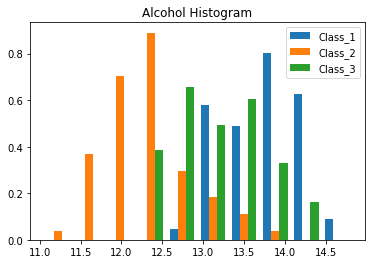

In [22]:
plt.hist([class_1['Alcohol'],class_2['Alcohol'], class_3['Alcohol']], density=True)
plt.title('Alcohol Histogram')
plt.legend(['Class_1', 'Class_2', 'Class_3'])
plt.show()

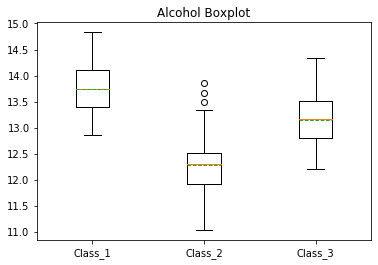

In [23]:
plt.boxplot([class_1['Alcohol'],class_2['Alcohol'], class_3['Alcohol']], 
            labels=['Class_1', 'Class_2', 'Class_3'],
           meanline=True,
           showmeans=True)
plt.title('Alcohol Boxplot')
plt.show()

In [24]:
print('Mean')
print(means['Alcohol'].values)
print('Median')
print(medians['Alcohol'].values)
print('Variance')
print(variances['Alcohol'].values)
print('Standard Deviation')
print(stds['Alcohol'].values)

Mean
[13.74474576 12.27873239 13.15375   ]
Median
[13.75  12.29  13.165]
Variance
[0.20994019 0.28532938 0.27529844]
Standard Deviation
[0.45819231 0.53416232 0.5246889 ]


### 2) Malic Acid
- 와인 특유의 신맛을 나타내는 성분.

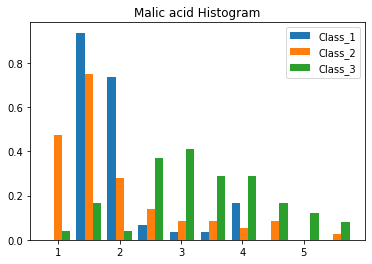

In [25]:
plt.hist([class_1['Malic acid'],class_2['Malic acid'], class_3['Malic acid']], density=True)
plt.title('Malic acid Histogram')
plt.legend(['Class_1', 'Class_2', 'Class_3'])
plt.show()

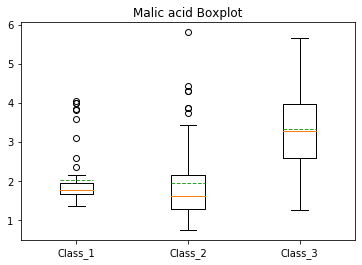

In [26]:
plt.boxplot([class_1['Malic acid'],class_2['Malic acid'], class_3['Malic acid']], 
            labels=['Class_1', 'Class_2', 'Class_3'],
           meanline=True,
           showmeans=True)
plt.title('Malic acid Boxplot')
plt.show()

In [27]:
print('Mean')
print(means['Malic acid'].values)
print('Median')
print(medians['Malic acid'].values)
print('Variance')
print(variances['Malic acid'].values)
print('Standard Deviation')
print(stds['Malic acid'].values)

Mean
[2.01067797 1.93267606 3.33375   ]
Median
[1.77  1.61  3.265]
Variance
[0.46606395 1.0168534  1.15888177]
Standard Deviation
[0.68268876 1.00839149 1.07651371]


###  3) Ash
- 영양학에서, 음식물 속에 들어 있는 무기물 또는 무기물의 전체 분량에 대한 비율을 이르는 말.

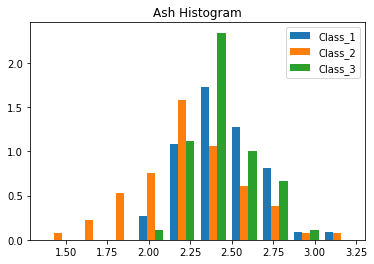

In [28]:
plt.hist([class_1['Ash'],class_2['Ash'], class_3['Ash']], density=True)
plt.title('Ash Histogram')
plt.legend(['Class_1', 'Class_2', 'Class_3'])
plt.show()

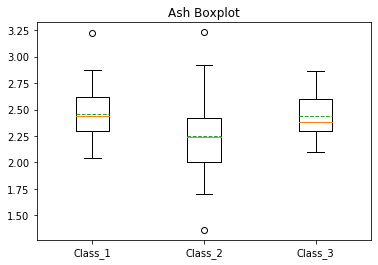

In [29]:
plt.boxplot([class_1['Ash'],class_2['Ash'], class_3['Ash']], 
            labels=['Class_1', 'Class_2', 'Class_3'],
           meanline=True,
           showmeans=True)
plt.title('Ash Boxplot')
plt.show()

In [30]:
print('Mean')
print(means['Ash'].values)
print('Median')
print(medians['Ash'].values)
print('Variance')
print(variances['Ash'].values)
print('Standard Deviation')
print(stds['Ash'].values)

Mean
[2.45559322 2.24478873 2.43708333]
Median
[2.44 2.24 2.38]
Variance
[0.05072973 0.09811791 0.03339983]
Standard Deviation
[0.22523262 0.31323779 0.18275619]


### 4) Alcalinity of ash
- 무기물의 염기성 정도.

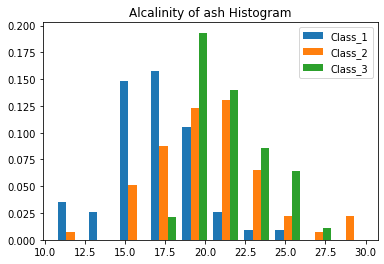

In [31]:
plt.hist([class_1['Alcalinity of ash'],class_2['Alcalinity of ash'], class_3['Alcalinity of ash']], density=True)
plt.title('Alcalinity of ash Histogram')
plt.legend(['Class_1', 'Class_2', 'Class_3'])
plt.show()

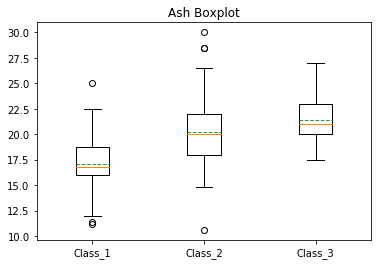

In [32]:
plt.boxplot([class_1['Alcalinity of ash'],class_2['Alcalinity of ash'], class_3['Alcalinity of ash']], 
            labels=['Class_1', 'Class_2', 'Class_3'],
           meanline=True,
           showmeans=True)
plt.title('Ash Boxplot')
plt.show()

In [33]:
print('Mean')
print(means['Alcalinity of ash'].values)
print('Median')
print(medians['Alcalinity of ash'].values)
print('Variance')
print(variances['Alcalinity of ash'].values)
print('Standard Deviation')
print(stds['Alcalinity of ash'].values)

Mean
[17.03728814 20.23802817 21.41666667]
Median
[16.8 20.  21. ]
Variance
[ 6.37386383 11.06292006  4.99305556]
Standard Deviation
[2.52465123 3.32609682 2.23451461]


### 5) Magnesium
- 마그네슘 함량.

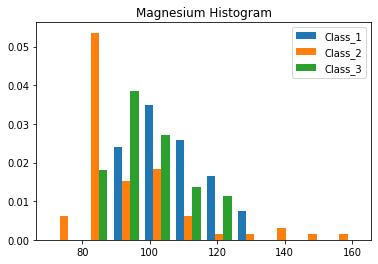

In [34]:
plt.hist([class_1['Magnesium'],class_2['Magnesium'], class_3['Magnesium']], density=True)
plt.title('Magnesium Histogram')
plt.legend(['Class_1', 'Class_2', 'Class_3'])
plt.show()

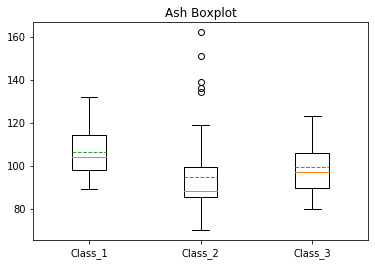

In [35]:
plt.boxplot([class_1['Magnesium'],class_2['Magnesium'], class_3['Magnesium']], 
            labels=['Class_1', 'Class_2', 'Class_3'],
           meanline=True,
           showmeans=True)
plt.title('Ash Boxplot')
plt.show()

In [36]:
print('Mean')
print(means['Magnesium'].values)
print('Median')
print(medians['Magnesium'].values)
print('Variance')
print(variances['Magnesium'].values)
print('Standard Deviation')
print(stds['Magnesium'].values)

Mean
[106.33898305  94.54929577  99.3125    ]
Median
[104.  88.  97.]
Variance
[108.35966676 276.72644317 116.13151042]
Standard Deviation
[10.40959494 16.63509673 10.7764331 ]


### 6) Total phenols
- 와인에 들어있는 페놀의 전체 양.

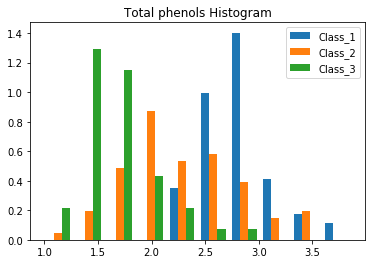

In [37]:
plt.hist([class_1['Total phenols'],class_2['Total phenols'], class_3['Total phenols']], density=True)
plt.title('Total phenols Histogram')
plt.legend(['Class_1', 'Class_2', 'Class_3'])
plt.show()

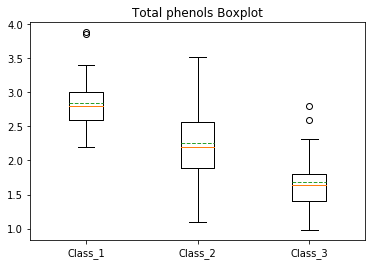

In [38]:
plt.boxplot([class_1['Total phenols'],class_2['Total phenols'], class_3['Total phenols']], 
            labels=['Class_1', 'Class_2', 'Class_3'],
           meanline=True,
           showmeans=True)
plt.title('Total phenols Boxplot')
plt.show()

In [39]:
print('Mean')
print(means['Total phenols'].values)
print('Median')
print(medians['Total phenols'].values)
print('Variance')
print(variances['Total phenols'].values)
print('Standard Deviation')
print(stds['Total phenols'].values)

Mean
[2.84016949 2.25887324 1.67875   ]
Median
[2.8   2.2   1.635]
Variance
[0.11294743 0.29322972 0.12477344]
Standard Deviation
[0.33607652 0.54150689 0.35323284]


### 7) Flavanoids
- 레드 와인의 페놀 성분 중 최대 90% 비율을 나타내는 폴리 페놀 성분을 플라보노이드 라고 한다. 떫은 맛을 내는 탄닌이 플라보노이드에 속한다.

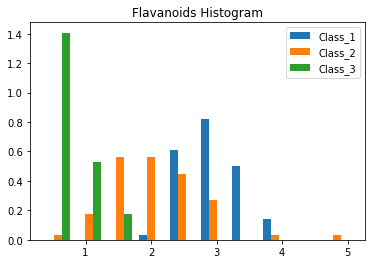

In [40]:
plt.hist([class_1['Flavanoids'],class_2['Flavanoids'], class_3['Flavanoids']], density=True)
plt.title('Flavanoids Histogram')
plt.legend(['Class_1', 'Class_2', 'Class_3'])
plt.show()

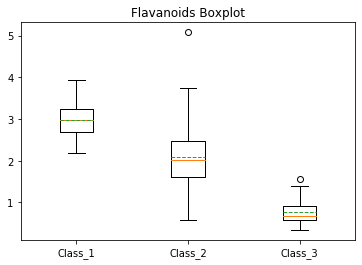

In [41]:
plt.boxplot([class_1['Flavanoids'],class_2['Flavanoids'], class_3['Flavanoids']], 
            labels=['Class_1', 'Class_2', 'Class_3'],
           meanline=True,
           showmeans=True)
plt.title('Flavanoids Boxplot')
plt.show()

In [42]:
print('Mean')
print(means['Flavanoids'].values)
print('Median')
print(medians['Flavanoids'].values)
print('Variance')
print(variances['Flavanoids'].values)
print('Standard Deviation')
print(stds['Flavanoids'].values)

Mean
[2.98237288 2.08084507 0.78145833]
Median
[2.98  2.03  0.685]
Variance
[0.15532318 0.49099929 0.08434996]
Standard Deviation
[0.39411062 0.70071341 0.29043064]


### 8) Nonflavanoid phenols
- 90% 성분을 제외한 10%의 페놀 성분들.

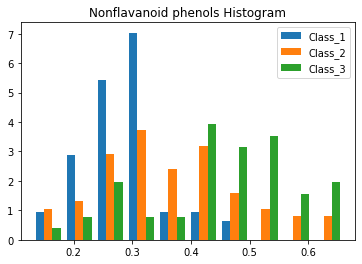

In [43]:
plt.hist([class_1['Nonflavanoid phenols'],class_2['Nonflavanoid phenols'], class_3['Nonflavanoid phenols']], density=True)
plt.title('Nonflavanoid phenols Histogram')
plt.legend(['Class_1', 'Class_2', 'Class_3'])
plt.show()

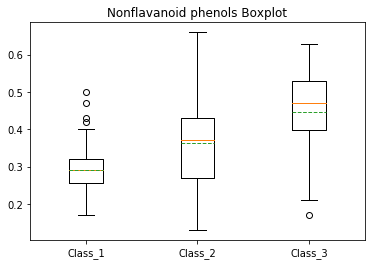

In [44]:
plt.boxplot([class_1['Nonflavanoid phenols'],class_2['Nonflavanoid phenols'], class_3['Nonflavanoid phenols']], 
            labels=['Class_1', 'Class_2', 'Class_3'],
           meanline=True,
           showmeans=True)
plt.title('Nonflavanoid phenols Boxplot')
plt.show()

In [45]:
print('Mean')
print(means['Nonflavanoid phenols'].values)
print('Median')
print(medians['Nonflavanoid phenols'].values)
print('Variance')
print(variances['Nonflavanoid phenols'].values)
print('Standard Deviation')
print(stds['Nonflavanoid phenols'].values)

Mean
[0.29       0.36366197 0.4475    ]
Median
[0.29 0.37 0.47]
Variance
[0.00482373 0.01514997 0.01508958]
Standard Deviation
[0.06945307 0.12308522 0.12283967]


### 9) Proanthocyanins
- 심장혈관 질환의 발병률을 낮추는데 도움을 주는 성분.

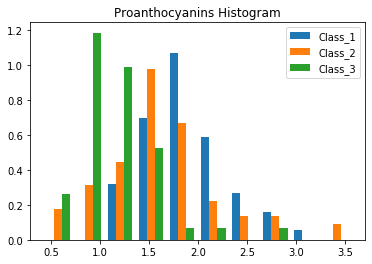

In [46]:
plt.hist([class_1['Proanthocyanins'],class_2['Proanthocyanins'], class_3['Proanthocyanins']], density=True)
plt.title('Proanthocyanins Histogram')
plt.legend(['Class_1', 'Class_2', 'Class_3'])
plt.show()

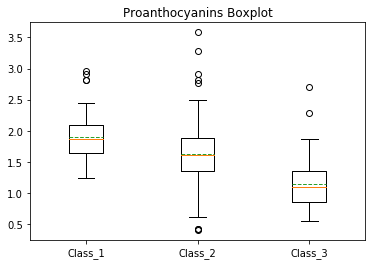

In [47]:
plt.boxplot([class_1['Proanthocyanins'],class_2['Proanthocyanins'], class_3['Proanthocyanins']], 
            labels=['Class_1', 'Class_2', 'Class_3'],
           meanline=True,
           showmeans=True)
plt.title('Proanthocyanins Boxplot')
plt.show()

In [48]:
print('Mean')
print(means['Proanthocyanins'].values)
print('Median')
print(medians['Proanthocyanins'].values)
print('Variance')
print(variances['Proanthocyanins'].values)
print('Standard Deviation')
print(stds['Proanthocyanins'].values)

Mean
[1.89932203 1.63028169 1.15354167]
Median
[1.87  1.61  1.105]
Variance
[0.16695547 0.3573802  0.16366454]
Standard Deviation
[0.40860185 0.59781285 0.40455474]


### 10)  Color intensity
- 색의 진한 정도.

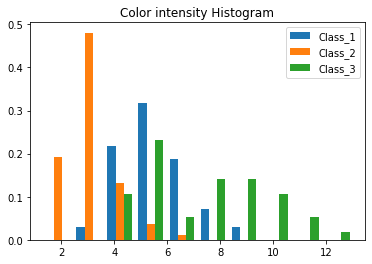

In [49]:
plt.hist([class_1['Color intensity'],class_2['Color intensity'], class_3['Color intensity']], density=True)
plt.title('Color intensity Histogram')
plt.legend(['Class_1', 'Class_2', 'Class_3'])
plt.show()

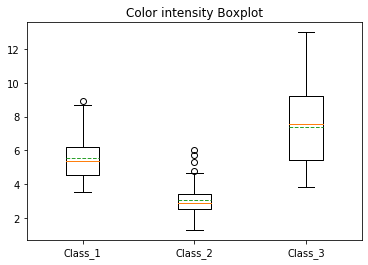

In [50]:
plt.boxplot([class_1['Color intensity'],class_2['Color intensity'], class_3['Color intensity']], 
            labels=['Class_1', 'Class_2', 'Class_3'],
           meanline=True,
           showmeans=True)
plt.title('Color intensity Boxplot')
plt.show()

In [51]:
print('Mean')
print(means['Color intensity'].values)
print('Median')
print(medians['Color intensity'].values)
print('Variance')
print(variances['Color intensity'].values)
print('Standard Deviation')
print(stds['Color intensity'].values)

Mean
[5.52830508 3.08661972 7.39624998]
Median
[5.4  2.9  7.55]
Variance
[1.50806153 0.84344491 5.22919417]
Standard Deviation
[1.22803157 0.91839257 2.28674314]


### 11) Hue
- 와인을 잔에 따라 흔들었을 때 와인과 글라스의 경계 부분의 색깔이 다른 정도. Edge 라고도 한다.

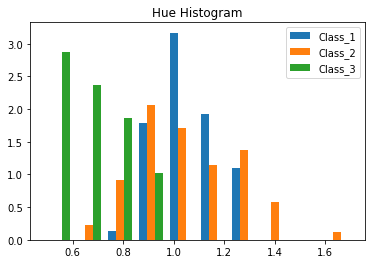

In [52]:
plt.hist([class_1['Hue'],class_2['Hue'], class_3['Hue']], density=True)
plt.title('Hue Histogram')
plt.legend(['Class_1', 'Class_2', 'Class_3'])
plt.show()

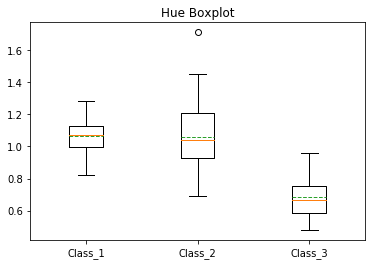

In [53]:
plt.boxplot([class_1['Hue'],class_2['Hue'], class_3['Hue']], 
            labels=['Class_1', 'Class_2', 'Class_3'],
           meanline=True,
           showmeans=True)
plt.title('Hue Boxplot')
plt.show()

In [54]:
print('Mean')
print(means['Hue'].values)
print('Median')
print(medians['Hue'].values)
print('Variance')
print(variances['Hue'].values)
print('Standard Deviation')
print(stds['Hue'].values)

Mean
[1.0620339  1.05628169 0.68270833]
Median
[1.07  1.04  0.665]
Variance
[0.01333824 0.0406033  0.01282391]
Standard Deviation
[0.11549128 0.20150261 0.11324273]


### 12) OD280/OD315 of diluted wines

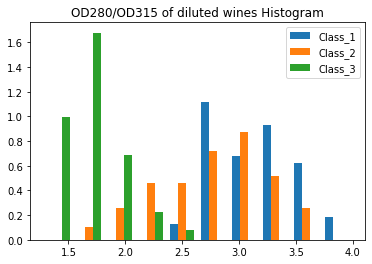

In [55]:
plt.hist([class_1['OD280/OD315 of diluted wines'],class_2['OD280/OD315 of diluted wines'], class_3['OD280/OD315 of diluted wines']], 
         density=True)
plt.title('OD280/OD315 of diluted wines Histogram')
plt.legend(['Class_1', 'Class_2', 'Class_3'])
plt.show()

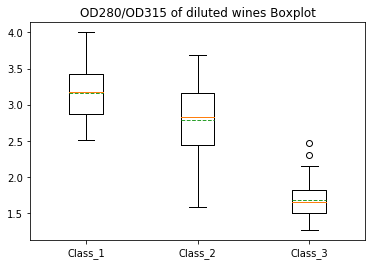

In [56]:
plt.boxplot([class_1['OD280/OD315 of diluted wines'],class_2['OD280/OD315 of diluted wines'], class_3['OD280/OD315 of diluted wines']], 
            labels=['Class_1', 'Class_2', 'Class_3'],
           meanline=True,
           showmeans=True)
plt.title('OD280/OD315 of diluted wines Boxplot')
plt.show()

In [57]:
print('Mean')
print(means['OD280/OD315 of diluted wines'].values)
print('Median')
print(medians['OD280/OD315 of diluted wines'].values)
print('Variance')
print(variances['OD280/OD315 of diluted wines'].values)
print('Standard Deviation')
print(stds['OD280/OD315 of diluted wines'].values)

Mean
[3.15779661 2.78535211 1.68354167]
Median
[3.17 2.83 1.66]
Variance
[0.1253426  0.2431122  0.07250204]
Standard Deviation
[0.35403757 0.49306409 0.26926203]


### 13) Proline
- 와인의 아미노산 성분 중 가장 많은 양을 차지하는 아미노산.

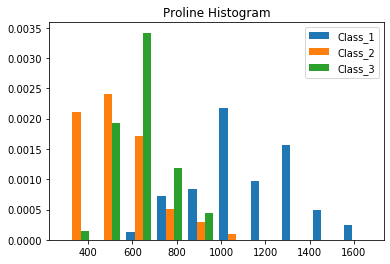

In [58]:
plt.hist([class_1['Proline'],class_2['Proline'], class_3['Proline']], density=True)
plt.title('Proline Histogram')
plt.legend(['Class_1', 'Class_2', 'Class_3'])
plt.show()

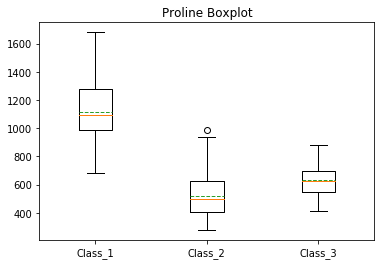

In [59]:
plt.boxplot([class_1['Proline'],class_2['Proline'], class_3['Proline']], 
            labels=['Class_1', 'Class_2', 'Class_3'],
           meanline=True,
           showmeans=True)
plt.title('Proline Boxplot')
plt.show()

In [60]:
print('Mean')
print(means['Proline'].values)
print('Median')
print(medians['Proline'].values)
print('Variance')
print(variances['Proline'].values)
print('Standard Deviation')
print(stds['Proline'].values)

Mean
[1115.71186441  519.50704225  629.89583333]
Median
[1095.   495.   627.5]
Variance
[48239.7305372  24367.26403491 12971.34331597]
Standard Deviation
[219.63544918 156.10017308 113.89180531]


클래스 별로 Mean, Median, Variance, Standard Deviation을 분포 그래프와 확인해 볼 수 있었습니다.

### Reference

- 평균 https://en.wikipedia.org/wiki/Mean
- 중간값 https://en.wikipedia.org/wiki/Median
- 분산 https://en.wikipedia.org/wiki/Variance
- 표준편차 https://en.wikipedia.org/wiki/Standard_deviation

## 1. 히스토그램(Histogram)

수치형 변수의 분포를 보여줍니다.

In [61]:
data.head(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [62]:
type(data.Ash)

pandas.core.series.Series

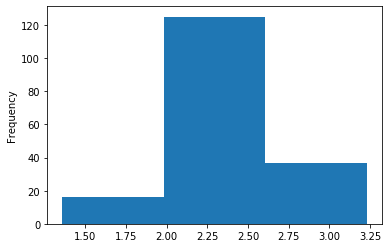

In [63]:
# compare with histogram
data.Ash.plot(kind='hist', bins=3)

Text(0.5, 1.0, 'Histogram of Wine Ash')

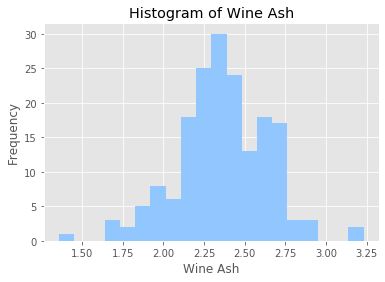

In [100]:
# 구간을 더 나눕니다.
# 범례와 제목을 추가합니다.
data.Ash.plot(kind='hist', bins=20)
plt.xlabel('Wine Ash')
plt.ylabel('Frequency')
plt.title('Histogram of Wine Ash')

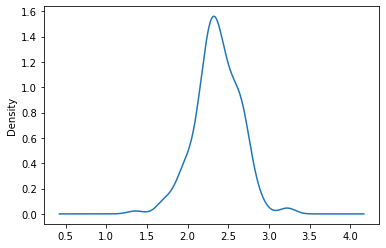

In [65]:
# # 밀도함수 그래프와 비교해봅니다. (smooth version of a histogram)
data.Ash.plot(kind='density')

In [66]:
data.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
       'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe0b6342b0>,
      dtype=object)

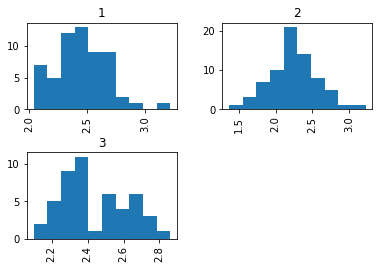

In [67]:
# Class에 따른 Ash 히스토그램

data.hist(column='Ash', by='Class')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe08c08a20>,
      dtype=object)

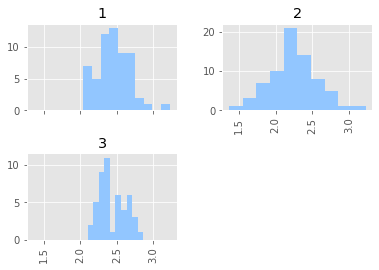

In [101]:
# x 축을 공유합니다.
data.hist(column='Ash', by='Class', sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe13c205f8>,
      dtype=object)

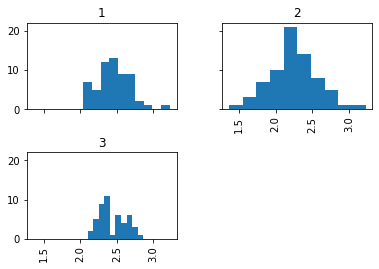

In [69]:
# x 축과 y 축을 공유합니다.
data.hist(column='Ash', by='Class', sharex=True, sharey=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe0b2c3f60>,
      dtype=object)

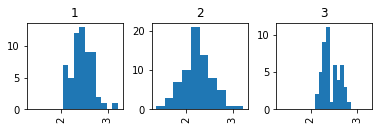

In [70]:
# 레이아웃을 바꿉니다.
data.hist(column='Ash', by='Class', sharex=True, layout=(2, 3))

## 2. 산점도 (Scatter plot)
두 연속형 변수의 관계를 보기 위해 plotting합니다.

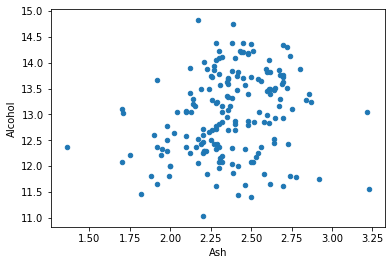

In [71]:
# 산점도를 찍어봅니다.
data.plot(kind='scatter', x='Ash', y='Alcohol')

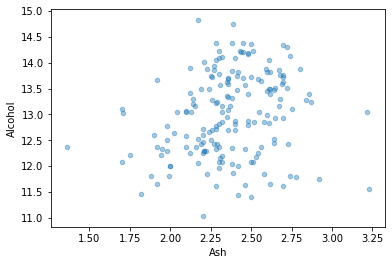

In [72]:
# 투명도를 추가합니다.
data.plot(kind='scatter', x='Ash', y='Alcohol', alpha=0.4)

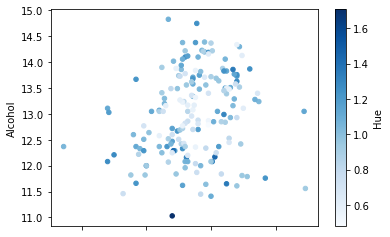

In [73]:
# 'Hue'라는 변수에 따라 색을 달리하여 산점도를 찍습니다.
data.plot(kind='scatter', x='Ash', y='Alcohol', c='Hue', colormap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe0af9bf98>,
      dtype=object)

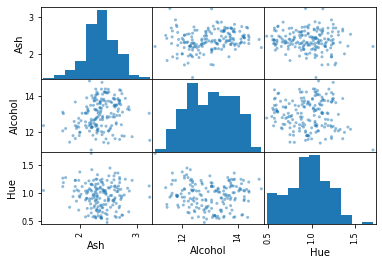

In [74]:
# 3개의 연속형 변수들의 산점도
pd.plotting.scatter_matrix(data[['Ash', 'Alcohol', 'Hue']])

## 3. 막대그래프(Bar plot)
서로 다른 범주들을 교차하여 수치를 비교할 수 있습니다.

In [75]:
# 등급에 따른 와인의 수를 카운팅합니다.
data.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

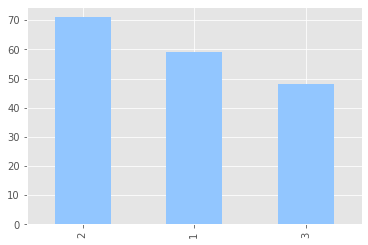

In [102]:
# 막대그래프와 비교합니다.
data.Class.value_counts().plot(kind='bar')

In [77]:
# 등급에 따른 평균값을 구합니다.
data.groupby('Class').mean()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Class,,,,,,,,,,,,,
1,13.745,2.011,2.456,17.037,106.339,2.840,2.982,0.290,1.899,5.528,1.062,3.158,1115.712
2,12.279,1.933,2.245,20.238,94.549,2.259,2.081,0.364,1.630,3.087,1.056,2.785,519.507
3,13.154,3.334,2.437,21.417,99.312,1.679,0.781,0.447,1.154,7.396,0.683,1.684,629.896


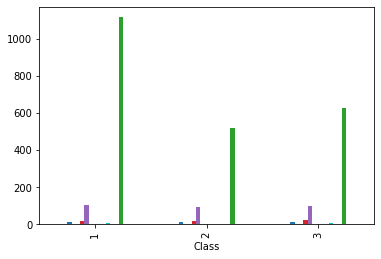

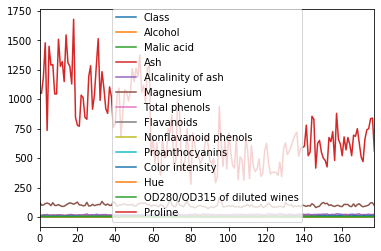

In [78]:
#나란히 비교하는 막대그래프를 그려봅니다.
data.groupby('Class').mean().plot(kind='bar',legend = False)
data.plot(legend=True)

In [79]:
data.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
       'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

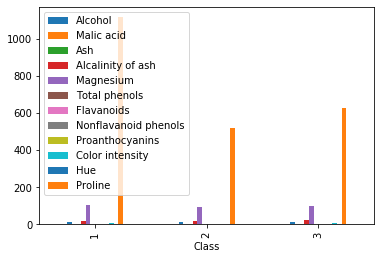

In [80]:
#  OD280/OD315 of diluted wines 칼럼을 제외합니다.
data.groupby('Class').mean().drop('OD280/OD315 of diluted wines', axis=1).plot(kind='bar')

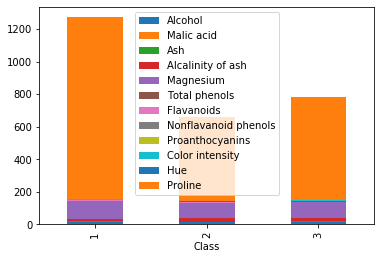

In [81]:
# 누적막대그래프를 그립니다.
data.groupby('Class').mean().drop('OD280/OD315 of diluted wines', axis=1).plot(kind='bar', stacked=True)

## 4. Box plot
하나이상의 연속형 변수들의 사분위수와 이상치를 나타내줍니다.

**다섯 수치 요약(Five-number summary):**

- min = 최솟값
- 25% = 1사분위수 (Q1)
- 50% = 2사분위수 (Q2) = 중간값
- 75% = 3사분위수 (Q3)
- max = 최댓값

(평균과 표준편차에 비해 분포의 왜도를 표현하기에 유용하다)

**사분위 범위(Interquartile Range :IQR)** = Q3 - Q1

**이상치(Outliers):**

-  Q1 - 1.5 * IQR 미만
-  Q3 + 1.5 * IQR 초과

In [82]:
# 마그네슘 함유량으로 정렬
data.Magnesium.sort_values()

89      70
82      78
67      78
66      78
118     80
92      80
106     80
129     80
146     80
90      81
124     82
107     84
114     84
88      84
97      85
104     85
115     85
83      85
125     85
134     85
80      86
103     86
116     86
91      86
171     86
123     86
126     86
76      86
147     86
71      86
      ... 
169    112
144    112
149    113
3      113
17     115
53     115
19     116
152    116
55     116
40     117
56     118
54     118
4      118
121    119
175    120
16     120
176    120
7      121
130    122
150    123
25     124
20     126
0      127
39     128
33     132
96     134
78     136
73     139
69     151
95     162
Name: Magnesium, Length: 178, dtype: int64

In [83]:
# 마그네슘에 대한 다섯수치요약
data.Magnesium.describe()

count    178.000
mean      99.742
std       14.282
min       70.000
25%       88.000
50%       98.000
75%      107.000
max      162.000
Name: Magnesium, dtype: float64

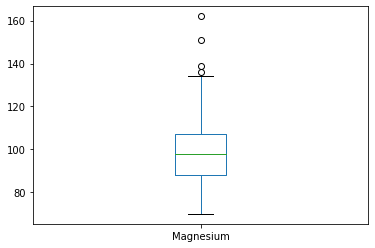

In [84]:
# 상자그림과 비교합니다.
data.Magnesium.plot(kind='box')

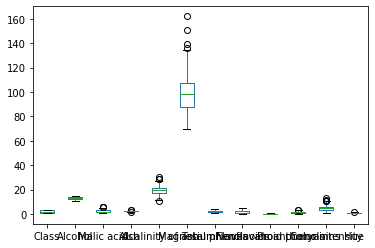

In [85]:
# 다수의 변수들에 적용할 수 있습니다.
data.drop(['OD280/OD315 of diluted wines','Proline'], axis=1).plot(kind='box')

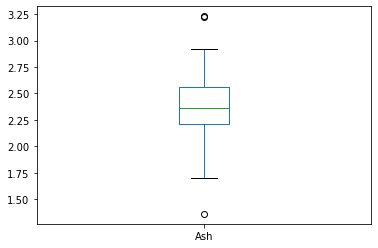

In [86]:
# 무기질에 대한 상자그림
data.Ash.plot(kind='box')

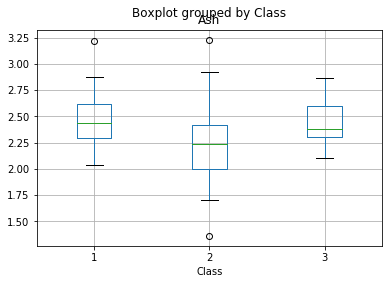

In [87]:
# 등급에 따른 무기질의 상자그림
data.boxplot(column='Ash', by='Class')

## 6. Saving a plot and Changing a style

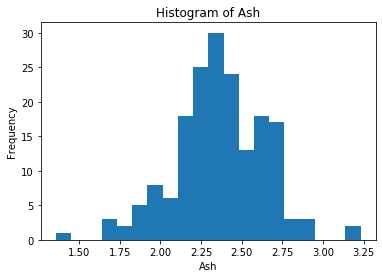

In [88]:
# plot을 파일로 저장합니다.
data.Ash.plot(kind='hist', bins=20, title='Histogram of Ash')
plt.xlabel('Ash')
plt.ylabel('Frequency')
plt.savefig('ash_histogram_original.png')

In [89]:
# 사용할 수 있는 스타일 리스트를 보여줍니다.
plt.style.available

['seaborn',
 'seaborn-paper',
 'classic',
 'seaborn-talk',
 'tableau-colorblind10',
 'dark_background',
 'Solarize_Light2',
 'seaborn-muted',
 '_classic_test',
 'ggplot',
 'bmh',
 'seaborn-pastel',
 'seaborn-colorblind',
 'seaborn-deep',
 'seaborn-darkgrid',
 'fast',
 'seaborn-dark-palette',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn-notebook',
 'fivethirtyeight',
 'grayscale',
 'seaborn-dark',
 'seaborn-bright',
 'seaborn-poster']

In [90]:
# 다른 스타일로 바꿉니다.
plt.style.use('ggplot')

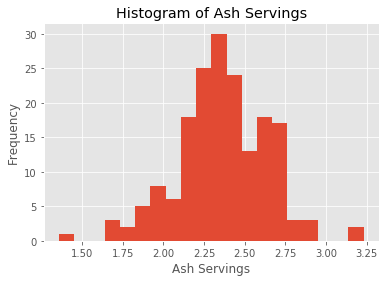

In [91]:
# 그래프를 파일로 저장합니다.
data.Ash.plot(kind='hist', bins=20, title='Histogram of Ash Servings')
plt.xlabel('Ash Servings')
plt.ylabel('Frequency')
plt.savefig('ash_histogram_ggplot.png')

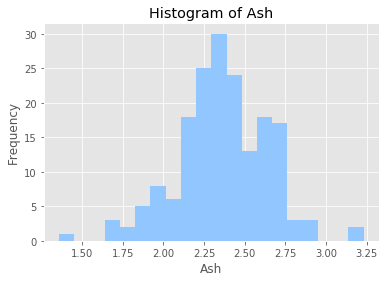

In [92]:
# Other example
plt.style.use('seaborn-pastel')
data.Ash.plot(kind='hist', bins=20, title='Histogram of Ash')
plt.xlabel('Ash')
plt.ylabel('Frequency')
plt.savefig('ash_histogram_seaborn.png')

# 7. Style

**Marker**:
- http://matplotlib.org/1.5.1/examples/lines_bars_and_markers/marker_reference.html
- http://matplotlib.org/api/markers_api.html

**Line**:
- http://matplotlib.org/1.5.1/examples/lines_bars_and_markers/line_styles_reference.html
- http://matplotlib.org/api/lines_api.html

**Color**:
- http://matplotlib.org/examples/color/named_colors.html
- http://matplotlib.org/api/colors_api.html


In [93]:
from IPython.display import Image

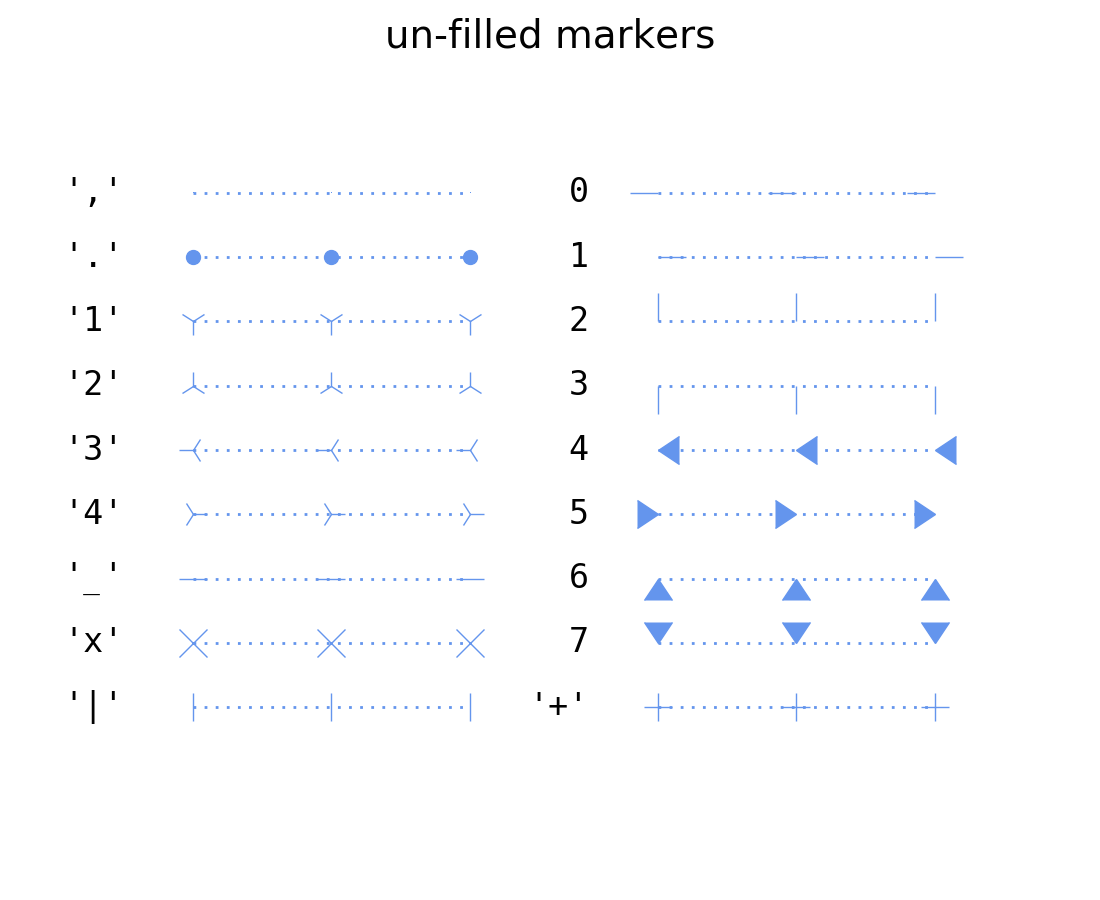

In [95]:
Image(filename="./image/marker_reference_00.png")

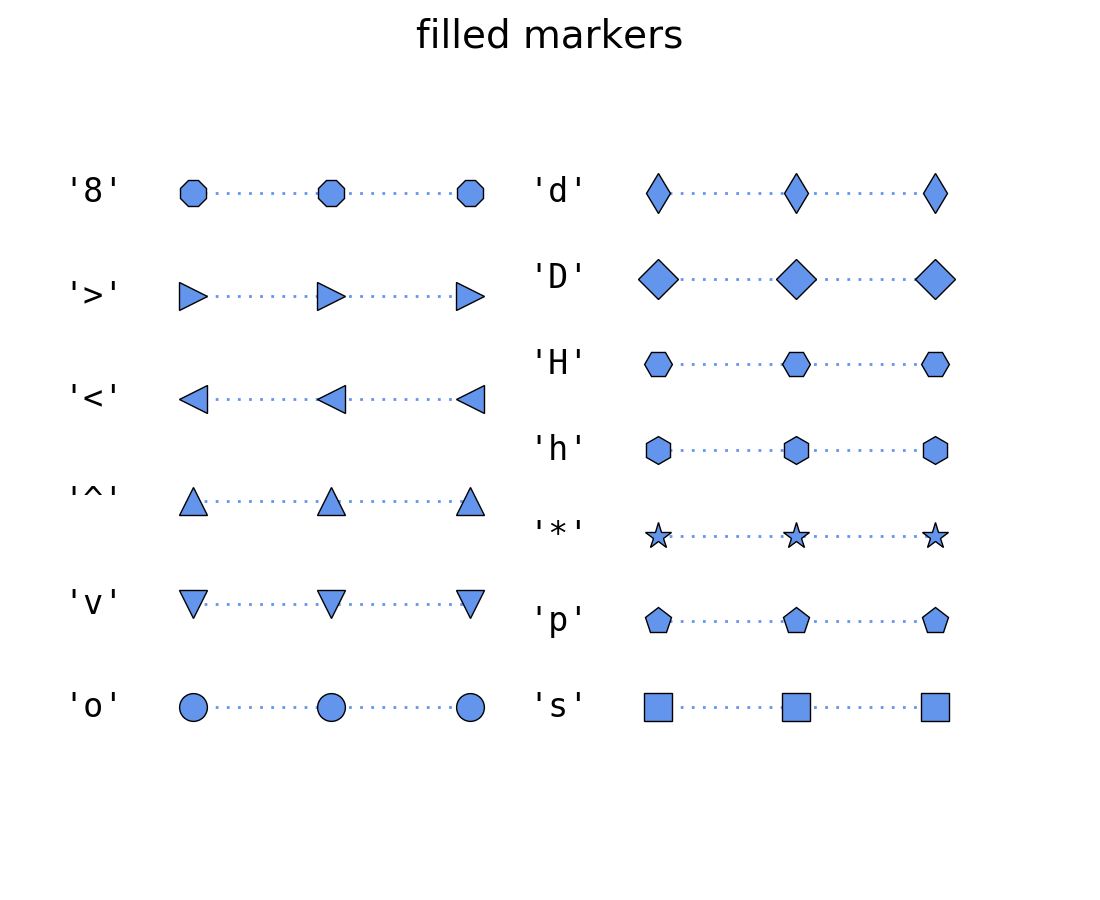

In [96]:
Image(filename="./image/marker_reference_01.png")

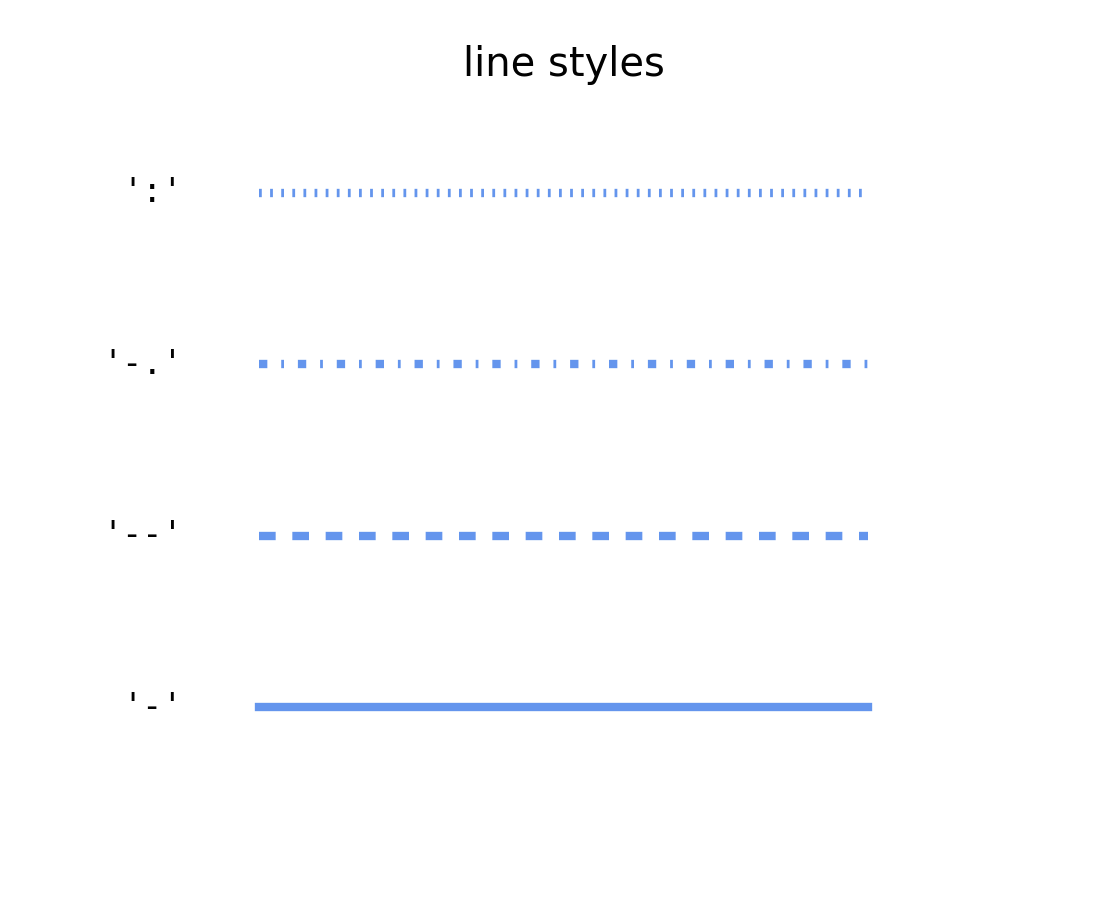

In [97]:
Image(filename="./image/line_styles_reference.png")

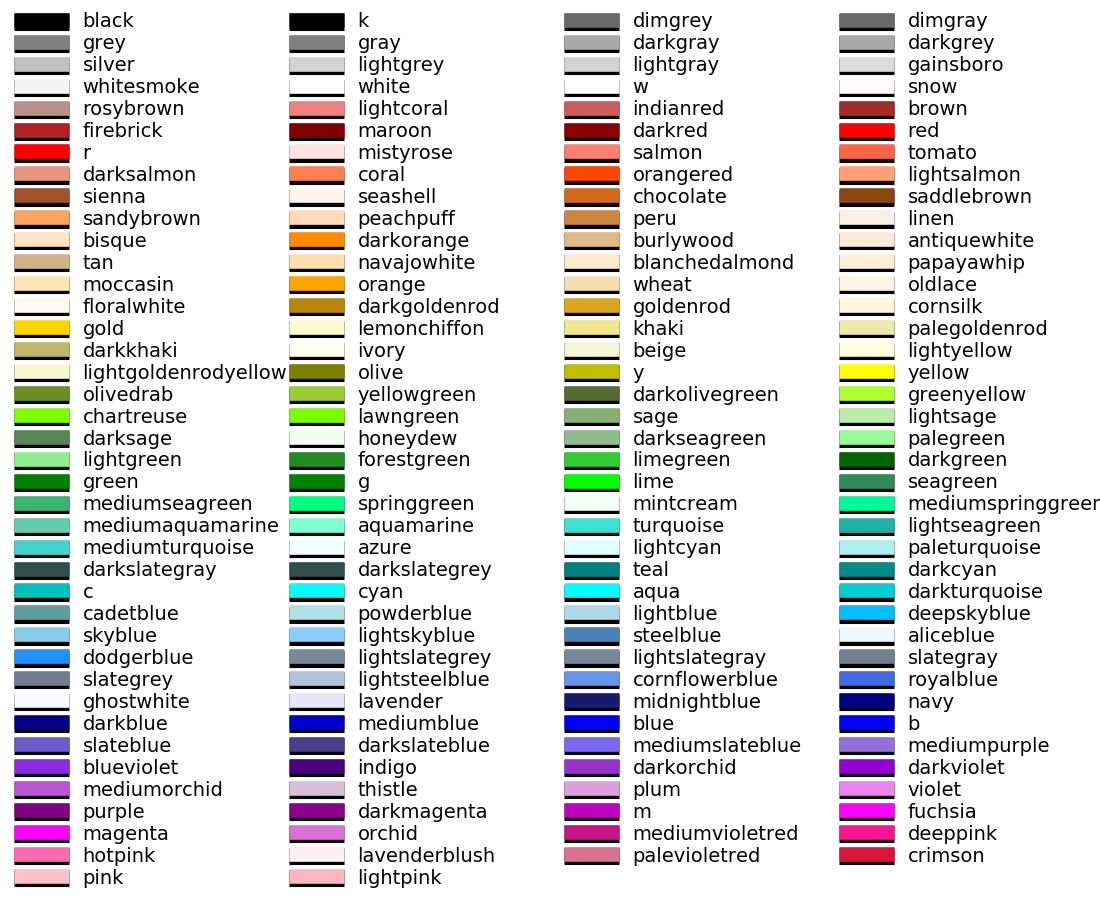

In [98]:
Image(filename="./image/named_colors.png")

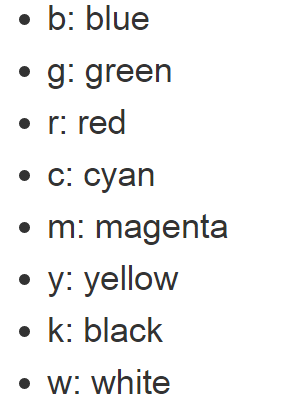

In [99]:
Image(filename="./image/named_colors_brief.PNG")

In [ ]:
# from http://matplotlib.org/users/pyplot_tutorial.html
# 자유롭게 변형해보면서 그림을 수정해보시오.

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'ro', t2, f(t2), 'k') # 'ro': 빨간색 동그라미, 'k': 검은색

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--') # 'r--': 빨간색 점선
plt.show()